<a href="https://colab.research.google.com/github/Md-Aziz-Developer/tensorflow-learning/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.
A classification is where you try to classify something as one thing ot another.
A few types of classification problem:
* Binary classification
* Multiclass classification
* Multilabel classfication

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples=1000

# Create circles
X,y= make_circles(n_samples,
                  noise=0.03,
                  random_state=42
                  )

In [2]:
# Check out features
X[:10],y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

Our data is a little hard to understand right now.. let's visualize it!

In [3]:
import pandas as pd
circles= pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


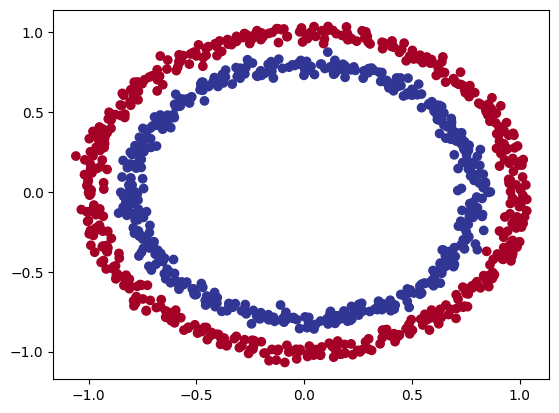

In [4]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

Exexcise url [playground.tensorflow.org](https://playground.tensorflow.org/)

## Input and output shapes

In [5]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [6]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [7]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), np.int64(1))

## Steps in modeling

The speps in modelling with TensorFlow are typically:

1. Create or import a model
2. Complite the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [8]:
import tensorflow as tf
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model the Sequential API
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy']
                )

# 3. Fit the model
model_1.fit(X,y, epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.4830 - loss: 1.6143
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4558 - loss: 0.7055
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4771 - loss: 0.6956
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4862 - loss: 0.6944
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4654 - loss: 0.6943


In [9]:
# Let's try and improve our model by training for longer...
model_1.fit(X,y,epochs=200,verbose=0)

In [10]:
model_1.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4852 - loss: 0.6927  


[0.6932879686355591, 0.4729999899864197]

Since we are working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if it's gueesing.

So let's step things up a notch and add an extra layer.

In [11]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy']
                )

# 3. Fit the model
model_2.fit(X,y,epochs=100,verbose=0)

In [12]:
# 4. Evaluate the model
model_2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4896 - loss: 0.6929  


[0.6932070255279541, 0.4909999966621399]

## Improving our model

Let's loop into our bag of tricks to see how we can improve our model.

1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer).


In [13]:
circles['label'].value_counts()

,count
label,
1,500
0,500


In [14]:
# Set a radom seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3= tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']
                )

# 3. Fit the model
model_3.fit(X,y,epochs=100,verbose=0)

In [15]:
# Evlauate the model
model_3.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5092 - loss: 0.6915


[0.695421576499939, 0.49000000953674316]

In [16]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,965 (15.49 KB)

 Trainable params: 1,321 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,644 (10.33 KB)

To visualize our model;s predictions, let's create a function `plot_decision_boundry()`, this function will:

* Take a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the prediction as well as line between zones (where each unique class falls)

In [17]:
import numpy as np

def plot_decision_boundary(model,X,y):
  """
  Plots the decision boundry created by a model predicting on X.
  """

  # Define the axis boundries of the plotz and create a meshgrid
  x_min,x_max=X[:,0].min() - 0.1 , X[:,0].max() + 0.1
  y_min,y_max=X[:,1].min() - 0.1 , X[:,1].max() + 0.1
  xx,yy= np.meshgrid(np.linspace(x_min,x_max,100),
                     np.linspace(y_min,y_max,100))

  # Create X value (we're going to make predictions on these)
  x_in=np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together

  # Make predictions
  y_pred= model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get then ready for plotting
    y_preds=np.argmax(y_preds,axis=1).reshape(xx.shape)
  else:
    print('doing binary classification')
    y_pred=np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


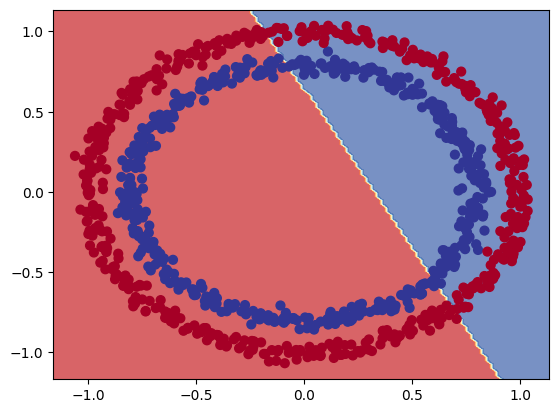

In [18]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,X=X,y=y)

In [19]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data

X_regression=tf.range(0,1000,5)
y_regression=tf.range(100,1100,5) # y=X + 100

# Split our regression data into training and test sets
X_reg_train=X_regression[:150]
X_reg_test=X_regression[150:]
y_reg_train=y_regression[:150]
y_reg_test=y_regression[150:]

# Fit our model to the regression data
model_3.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train,epochs=100)

Epoch 1/100


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 1), dtype=int32)
  • training=True
  • mask=None

we compiled our model for a binary classification problem.
But.. we're now working on regression problem, let's change the model to suit our data.

In [ ]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']
                )

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train,epochs=100)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


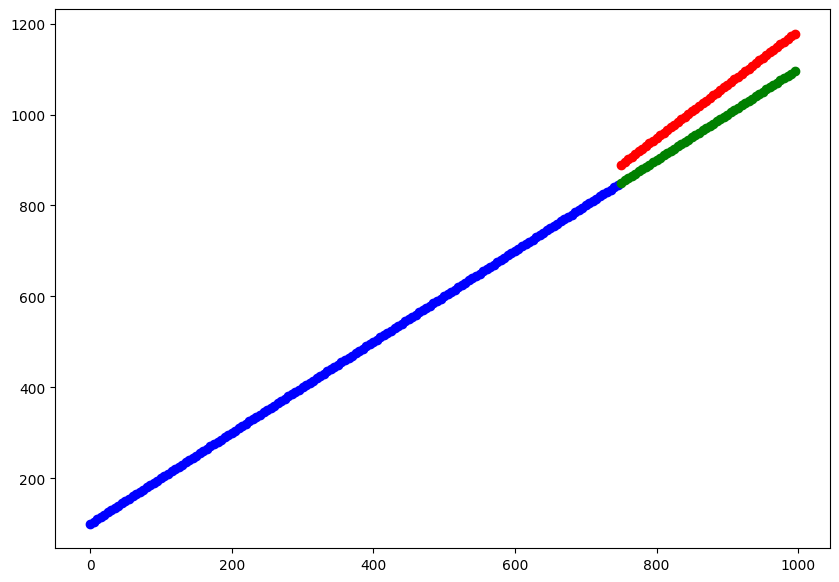

In [22]:
# Make prediction with our trained model
y_reg_preds=model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c="b",label="Training data")
plt.scatter(X_reg_test,y_reg_test,c="g",label="Test data")
plt.scatter(X_reg_test,y_reg_preds,c="r",label="Predictions")

## The missing piece Non-linearity

In [ ]:
# set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation='linear')
])

# 2. Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy']
                )

# Fit the model
model_4.fit(X,y,epochs=100)

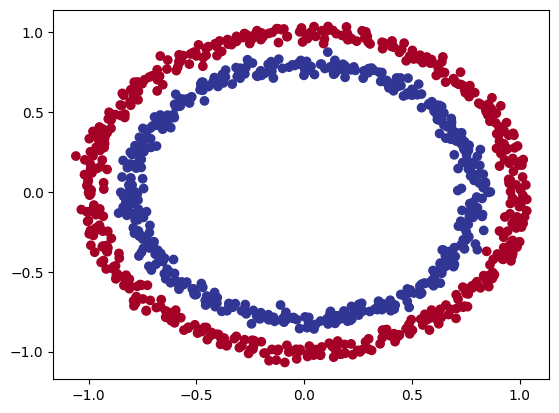

In [26]:
# Check out our data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification


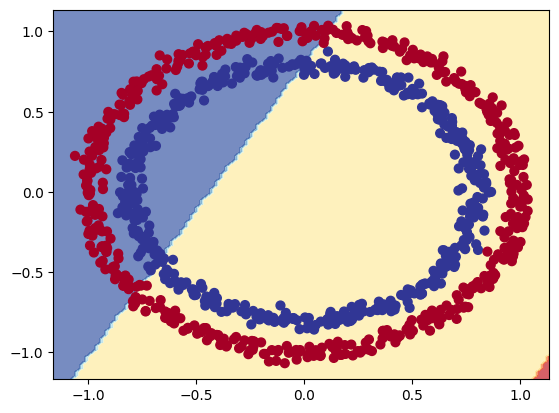

In [28]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,X=X,y=y)